In [17]:
import pandas as pd
import numpy as np
import sys
sys.path.append('./')
import trading_environment
from stable_baselines3 import DQN


df, df_daily_spy = trading_environment.read_trading_sym_data("./algo_data/vol_surfaces2.csv", "./algo_data/spy_daily_prices.csv")
print(f"df shape: {df.shape}")
env = trading_environment.SimEnv2(env_config={"df": df})
#env = trading_environment.SimEnv2(env_config={"df": df})

# ✅ Load the trained model
model = DQN.load("dqn_options_trading_27_params_30min_init_spread_12")
model.exploration_rate = 0.0
#model = DQN.load("dqn_options_trading_27_params_30min_init_spread_12")

# ✅ Initialize a new environment with the dataset


/Users/stirlitz/ncGitHub/daily_options/daily_options1/signals.py:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['minute'] = pd.to_datetime(df['minute'])


DataFrame is sorted by 'minute': True
df shape: (112999, 36)


In [287]:
nsteps_all=[]

In [40]:
#obs0,info = env.reset()
obs0,info = env.reset()
done = False

nsteps=0
obs=obs0

while not done:
    #print(f"obs: {obs}")
    action, _states = model.predict(obs)
    #print(f"action: {action}")
    if action == 0:
        buy_obs=obs
    obs, rewards, done, truncate, info = env.step(action)
    print(f"action: {action}, rewards: {rewards}, done: {done}, info: {info}")
    nsteps+=1
    if done:
        #nsteps_all.append(nsteps)
        break




action: 0, rewards: 0.12, done: False, info: {'action_mask': array([0, 1, 1]), 'state_dict': {'spot': np.float64(0.0069096492073690285), 'atm_vol': np.float64(0.1822084637688764), 'slope': np.float64(-0.0036609014624967), 'quadratic': np.float64(0.1973664198486814), 'steps_taken': np.float64(0.16666666666666666), 'steps_remaining': np.float64(0.8333333333333334), 'position': np.float64(1.9579853598496832), 'has_position': 1, 'pnl': 0, 'straddle_price': np.float64(0.003370659981756046), 'open_straddle_pnl': np.float64(-0.2782871388493757), 'under_realized_vol': np.float64(0.1209587729548242), 'close_to_open_return': np.float64(0.006644583776962865), 'open_price': np.float64(0.006644583776962865), 'under_max': np.float64(0.011179462912575433), 'under_min': np.float64(-0.025829094207184822), 'under_mean': np.float64(-0.0071148310264602665), 'hvol_60': np.float64(0.15946845707801852), 'min_price_daily': np.float64(0.004762566435254412), 'max_price_daily': np.float64(0.008197062149301937), 

In [41]:
a_date=env.df_today["date"].loc[env.start_index]
a_time=env.df_today["minute"].loc[env.start_index]
print(f"date: {a_date}, time: {a_time}, nsteps: {nsteps}")

date: 2024-03-06 00:00:00, time: 2024-03-06 11:04:00-05:00, nsteps: 6


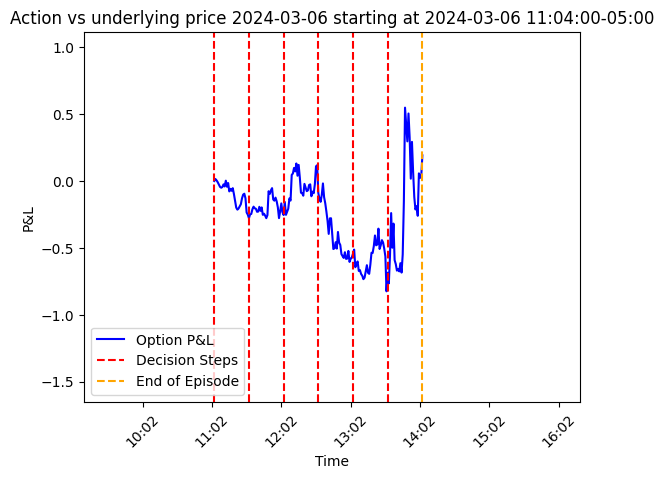

In [43]:
pos_size=1.95
#plt.plot(env.df_today["minute"], env.df_today["open_straddle_pnl"]*pos_size, label="open_straddle_pnl")

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df=env.df_today
start_minute=df.loc[env.start_index]["minute"]
#plt.plot(df["implied_spot"], label="implied_spot")
df["minute"]=pd.to_datetime(df["minute"])
df_episode=env.df_today.loc[env.position_open_time:env.global_index]
fig,ax1=plt.subplots()
#ax1.plot(df["minute"], df["implied_spot"], label='Implied Spot', color='blue')
ax1.plot(df_episode["minute"],df_episode["open_straddle_pnl"], label='Option P&L', color='blue')

ax1.axvline(x=start_minute, color='red', linestyle='--', label='Decision Steps')
for i in range(1,6):
    ax1.axvline(x=start_minute+pd.Timedelta(minutes=i*30), color='red', linestyle='--')
    #ax1.axvline(x=start_minute-pd.Timedelta(minutes=i), color='red', linestyle='--')
ax1.axvline(x=start_minute+pd.Timedelta(minutes=6*30), color='orange', linestyle='--',label="End of Episode")
ax1.fill_between(df["minute"], df["implied_spot"], color='white', where=((df["minute"] <= start_minute)|(df["minute"] >= (start_minute+pd.Timedelta(minutes=6*30)))))
#ax1.fill_between(switch_minutes, switches, color='lightblue')
ax1.set_xlabel('Time')
ax1.set_ylabel('P&L')

ax1.set_title(f"Action vs underlying price {a_date.date()} starting at {a_time}")
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=60))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=df["minute"].dt.tz))
#plt.sca(ax2)
ax1.set_ylim((df_episode["open_straddle_pnl"]).min()*2, (df_episode["open_straddle_pnl"]*pos_size+.2/6).max()*1.010)
plt.xticks(rotation=45)
ax1.legend()
fig.savefig("opton_pnl.png")

In [535]:
df_episode["open_str"]

KeyError: 'open_str'

In [116]:

action, _states = model.predict(obs0)
env.render()

Time: 2024-08-06 11:01:00-04:00, Position: 0, PnL: -0.8941502666361395


In [12]:
env.df_today["minute"].loc[env.start_index]

Timestamp('2024-04-19 11:43:00-0400', tz='UTC-04:00')

In [121]:
buy_obs

array([ 5.22379150e+02,  4.85858560e-01, -7.32398964e-03,  6.52957112e-02,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.14420700e+00,  0.00000000e+00,  1.96608052e-01,
        3.55638028e-03,  3.55638028e-03,  9.17700753e-02,  0.00000000e+00,
        5.80511428e-02,  5.23155868e-01,  1.21071900e-03,  1.27518345e-02,
        8.18338245e-03,  4.65790987e-01,  5.64504683e-01,  5.08816063e-01,
        1.18548414e-02], dtype=float32)

In [325]:
a_date=env.df_today["date"].loc[env.start_index]
a_time=env.df_today["minute"].loc[env.start_index]
obs0, info= env.reset(0,a_date, a_time.time())
env.step(1)

obs, rewards, done, truncate, info = env.step(1)

In [172]:
buy_obs-obs0
action, _states = model.predict(buy_obs)
action

array(1)

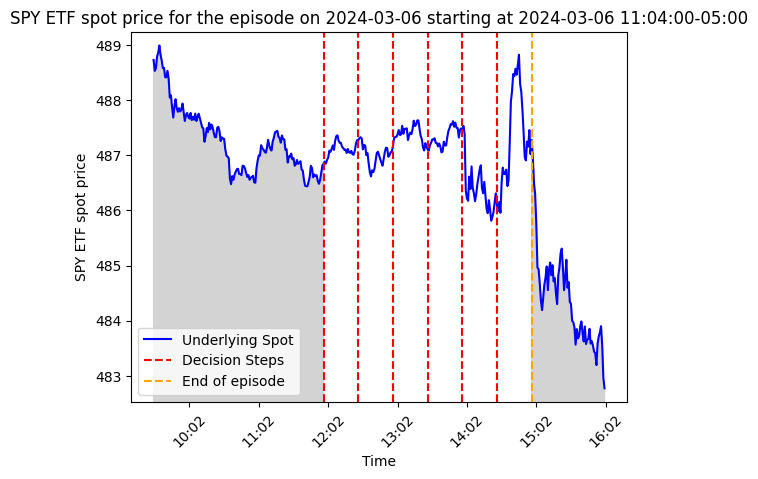

In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df=env.df_today
start_minute=df.loc[env.start_index]["minute"]
#plt.plot(df["implied_spot"], label="implied_spot")
df["minute"]=pd.to_datetime(df["minute"])
fig,ax1=plt.subplots()
ax1.plot(df["minute"], df["implied_spot"], label='Underlying Spot', color='blue')

ax1.axvline(x=start_minute, color='red', linestyle='--', label='Decision Steps')
for i in range(1,6):
    ax1.axvline(x=start_minute+pd.Timedelta(minutes=i*30), color='red', linestyle='--')
    #ax1.axvline(x=start_minute-pd.Timedelta(minutes=i), color='red', linestyle='--')
ax1.axvline(x=start_minute+pd.Timedelta(minutes=6*30), color='orange', linestyle='--',label="End of episode")
ax1.fill_between(df["minute"], df["implied_spot"], color='lightgray', where=((df["minute"] <= start_minute)|(df["minute"] >= (start_minute+pd.Timedelta(minutes=6*30)))))
ax1.set_xlabel('Time')
ax1.set_ylabel('SPY ETF spot price')
ax1.set_title(f"SPY ETF spot price for the episode on {a_date.date()} starting at {a_time}")
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=60))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=df["minute"].dt.tz))
#plt.sca(ax2)
ax1.set_ylim(df["implied_spot"].min()*.9995, df["implied_spot"].max()*1.00050)
plt.xticks(rotation=45)
ax1.legend()
fig.savefig("spy_spot_price_episode.png")


In [371]:
env.start_index
env.done=False
env.global_index=env.start_index
env.open_straddle_pnl=0
env.position=0
env.pnl=0
state=env._get_state()
state

array([ 5.8798572e+02,  1.6846317e-01, -8.8779638e-03,  2.5252956e-01,
        0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  1.9223686e+00,  0.0000000e+00,  1.4556982e-01,
       -5.8488483e-03, -5.8488483e-03,  1.8039616e-02, -3.3171810e-02,
       -5.3294227e-03,  2.1891220e-01, -5.6510139e-03, -2.7930512e-04,
       -2.5721882e-03,  1.6846317e-01,  2.3031215e-01,  1.9666661e-01,
       -6.4394355e-04], dtype=float32)

In [86]:
buy_obs

array([ 6.03212769e+02,  1.06861405e-01, -5.10846823e-03,  4.62991983e-01,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.23513484e+00,  0.00000000e+00,  1.18846305e-01,
        6.97037613e-04,  6.97037613e-04,  1.79238233e-03, -5.43357395e-02,
       -1.54659366e-02,  1.00812703e-01, -4.01277503e-05,  1.53211493e-03,
        8.64841917e-04,  1.05638959e-01,  1.23766758e-01,  1.14602864e-01,
        6.29316724e-04], dtype=float32)

In [88]:
state-buy_obs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [47]:
state=env._get_state()
multi_state=np.concatenate([state]*100).reshape(100, -1)
vol_variation=np.linspace(.80,1.2,100)
#multi_state[:,5]=multi_state[:,5]*1.25
multi_state[:,0]=multi_state[:,0]*vol_variation
#multi_state[:,1]=multi_state[:,1]*vol_variation

change_index=9
#multi_state[:,change_index]=multi_state[:,change_index]*vol_variation
change_index2=1
#multi_state[:,change_index2]=multi_state[:,change_index2]*vol_variation
multi_state
actions=model.predict(multi_state)
actions
multi_state[:,5]
actions
np.argmax(actions[0] == 0)

np.int64(0)

In [48]:
obs0,info = env.reset(0,a_date, a_time.time())
obs=obs0
print(f"obs: {obs}")
switches=[]
switch_minutes=[]
for i in range(0,179):
    switch_minute=env.df_today["minute"].loc[env.start_index]+pd.Timedelta(minutes=i)
    switch_minutes.append(switch_minute)
    multi_state=np.concatenate([obs]*100).reshape(100, -1)
    variation=np.linspace(.80,1.2,100)
    multi_state[:,0]=multi_state[:,0]*variation
    actions=model.predict(multi_state)
    one_action=model.predict(obs)
    env.update_time_step(1)
    obs=env._get_state()
    index=np.argmax(actions[0] == 0)
    if not any(actions[0] == 0):
        index=99
    switches.append(variation[index]*state[0])
    print(f"action: {actions[0]}, rewards: {rewards}, done: {done}, info: {info}")



obs: [ 6.99761137e-03  1.87454998e-01 -3.64473904e-03  1.47374302e-01
  0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.64865270e-03  0.00000000e+00  1.20958775e-01
  6.64458377e-03  6.64458377e-03  1.11794630e-02 -2.58290935e-02
 -7.11483089e-03  2.36060977e-01  2.61112885e-03  7.76320277e-03
  4.92513133e-03  1.85205117e-01  2.32223585e-01  2.08069608e-01
  6.67308504e-03  5.95102261e-04  2.43947189e-02]
action: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], rewards: -0.14200502221264255, done: True, info: {'action_mask': array([1, 1, 0])}
action: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], rewards: -0.14200502221264255, done: True, inf

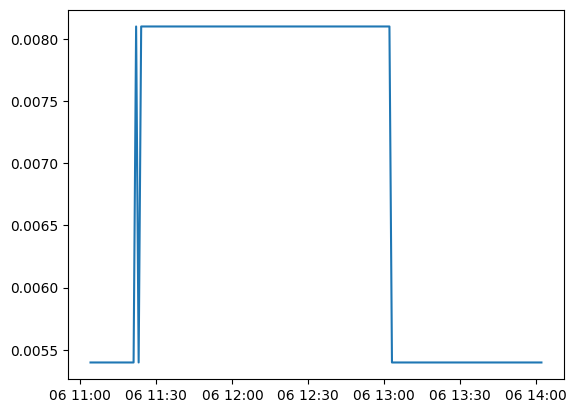

In [49]:
plt.plot(switch_minutes,switches)


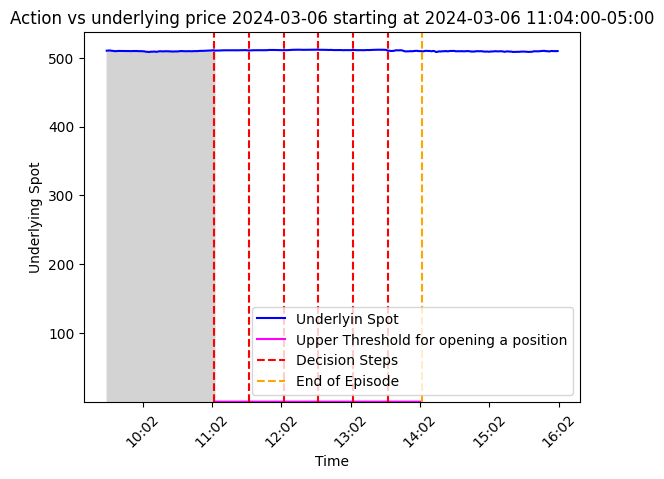

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df=env.df_today
start_minute=df.loc[env.start_index]["minute"]
#plt.plot(df["implied_spot"], label="implied_spot")
df["minute"]=pd.to_datetime(df["minute"])
fig,ax1=plt.subplots()
ax1.plot(df["minute"], df["implied_spot"], label='Underlyin Spot', color='blue')
ax1.plot(switch_minutes,switches, label='Upper Threshold for opening a position', color='magenta')

ax1.axvline(x=start_minute, color='red', linestyle='--', label='Decision Steps')
for i in range(1,6):
    ax1.axvline(x=start_minute+pd.Timedelta(minutes=i*30), color='red', linestyle='--')
    #ax1.axvline(x=start_minute-pd.Timedelta(minutes=i), color='red', linestyle='--')
ax1.axvline(x=start_minute+pd.Timedelta(minutes=6*30), color='orange', linestyle='--',label="End of Episode")
ax1.fill_between(df["minute"], df["implied_spot"], color='lightgray', where=(df["minute"] <= start_minute))
ax1.fill_between(switch_minutes, switches, color='lightblue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Underlying Spot')

ax1.set_title(f"Action vs underlying price {a_date.date()} starting at {a_time}")
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=60))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=df["minute"].dt.tz))
#plt.sca(ax2)
ax1.set_ylim(np.array(switches).min()*.99, df["implied_spot"].max()*1.050)
plt.xticks(rotation=45)
ax1.legend()
fig.savefig("spy_spot_price_episode_func_of_spot.png")

In [428]:
straddle_position=env.position
env.position

0

In [51]:
obs0,info = env.reset(0,a_date, a_time.time())
#obs=obs0
#print(f"obs: {obs}")
env.render()
obs, rewards, done, truncate, info= env.step(1)
#print(f"obs: {obs}")
env.render()
obs, rewards, done, truncate, info= env.step(1)
#print(f"obs: {obs}")
env.render()
print(f"info {info}")
print(f"obs: {obs}")
model.predict(obs)

multi_state=np.concatenate([obs]*100).reshape(100, -1)
variation=np.linspace(.80,1.2,100)
multi_state[:,0]=multi_state[:,0]*variation
actions=model.predict(multi_state)
actions


Time: 2024-03-06 11:04:00-05:00, Position: 0, PnL: 0
Time: 2024-03-06 11:34:00-05:00, Position: 0, PnL: 0
Time: 2024-03-06 12:04:00-05:00, Position: 0, PnL: 0
info {'action_mask': array([1, 1, 0]), 'state_dict': {'spot': np.float64(0.007803695785602693), 'atm_vol': np.float64(0.1886921337459945), 'slope': np.float64(-0.0038890259110573), 'quadratic': np.float64(0.2009197284881158), 'steps_taken': np.float64(0.3333333333333333), 'steps_remaining': np.float64(0.6666666666666666), 'position': 0, 'has_position': 0, 'pnl': 0, 'straddle_price': np.float64(0.0033020028923896835), 'open_straddle_pnl': np.int64(0), 'under_realized_vol': np.float64(0.1209587729548242), 'close_to_open_return': np.float64(0.006644583776962865), 'open_price': np.float64(0.006644583776962865), 'under_max': np.float64(0.011179462912575433), 'under_min': np.float64(-0.025829094207184822), 'under_mean': np.float64(-0.0071148310264602665), 'hvol_60': np.float64(0.12566599247642077), 'min_price_daily': np.float64(0.00674

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 None)

In [58]:
env2 = trading_environment.SimEnv2(env_config={"df": df})

def two_step(env2):
    no_buys = True
    obs, _ = env.reset()
    for i in range(0, 1):
        action, _states = model.predict(obs)
        if action == 0:
            no_buys = False
        obs, reward, done, truncated, info = env.step(2)
    return obs, no_buys

all_pairs = [two_step(env2) for _ in range(1, 1000)]
obs_dist = [pair[0] for pair in all_pairs if pair[1]]


In [59]:

import shap
import torch

# ✅ Function to get Q-values from the trained DQN model
def get_q_values(obs):
    obs_tensor = torch.tensor(obs, dtype=torch.float32)
    with torch.no_grad():
        q_values = model.policy.q_net(obs_tensor).numpy()
    return q_values

    # ✅ Define the function that returns 1 if Buy is chosen, 0 otherwise
def action_function(obs):
    obs_tensor= torch.tensor(obs, dtype=torch.float32)
    with torch.no_grad():
        q_values = model.policy.q_net(obs_tensor).numpy()
    #print(f"q_values={q_values}")
    best_action = np.argmax(q_values, axis=1)
    #action
    
    #action_hist=np.histogram(best_action, bins=[0,.5,1.5])
    #print(f"hist={action_hist}")
    #print(f"best_action = {best_action}")
    #return np.where(best_action == 1, 1, 0).reshape(-1,1)  # Assuming action 1 = Buy
    return (q_values[:,1]-q_values[:,2]).reshape(-1,1)

def close_desicion_env(env):
    obs, _ = env.reset()
    obs, reward, done, truncated, _ = env.step(0)
    return obs

obs_samples = np.array(obs_dist)
explainer = shap.KernelExplainer(action_function, obs_samples)
explainer_single_q = shap.KernelExplainer(get_q_values, obs_samples)
obs= obs_dist[0]
#print(f"obs={obs}")
shap_values = explainer.shap_values(obs)
shap_values_single_q = explainer_single_q.shap_values(obs)
print(shap_values[0])

# ✅ Visualize SHAP values

#shap.waterfall_plot(shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=obs))

Using 381 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Using 381 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


[0.00566711]


In [62]:
shap_values = explainer.shap_values(obs)
print([x[0] for x in shap_values])
feature_names=[
            'spot',
            'atm_vol',
            'slope',
            'quadratic',
            'steps_taken',
            'steps_remaining',
            'position',
            'has_position',
            'pnl',
            'straddle_price',
            'open_straddle_pnl',
            'under_realized_vol',
            'close_to_open_return',
            'open_price',
            'under_max',
            'under_min',
            'under_mean',
            'hvol_60',
            'min_price_daily',
            'max_price_daily',
            'mean_price_daily',
            'min_atm_vol_60',
            'max_atm_vol_60',
            'mean_atm_vol_60',
            'mean_price_10',
            'texp',
            'sqrt_texp'
            ]
# ✅ Create a DataFrame for easy visualization
df_shap = pd.DataFrame({
    "Feature": feature_names,  # Add feature names manually
    "SHAP Value": [x[0] for x in shap_values],  # Assuming this is for action 0
    "obs_value": obs
})
#df_shape_single_q = pd.DataFrame({
#    "Feature": feature_names,  # Add feature names manually
#    "SHAP Value": [x[1] for x in shap_values_single_q],  # Assuming this is for action 0
#    "obs_value": obs

#})
# ✅ Get the base Q-value for action 0
base_value = explainer.expected_value[0]  # Base Q-value for action 0
# ✅ Sort by importance
df_shap_sorted = df_shap.sort_values(by="SHAP Value", ascending=False)
#df_shap_sorted_single_q = df_shape_single_q.sort_values(by="SHAP Value", ascending=False)

print(df_shap_sorted)
print("bla")
#print(df_shap_sorted_single_q)
print(f"base_value={base_value}")

print(f"sum of shap values={sum([x[0] for x in shap_values])}")
#print(f"sum of shap values single q={sum([x[0] for x in shap_values_single_q])}")

#print(f"q_value_sell={get_q_values(obs.reshape(1, -1))[0][1]}")
#print(f"q_value_hold={get_q_values(obs.reshape(1, -1))[0][2]}")
print(f"base_value+sum of shap values={base_value+sum([x[0] for x in shap_values])}")
# ✅ Create a DataFrame for easy visualization
df_shap = pd.DataFrame({
    "Feature": feature_names,  # Add feature names manually
    "SHAP Value": [x[0] for x in shap_values],  # Assuming this is for action 0
    "obs_value": obs
})
#df_shape_single_q = pd.DataFrame({
#    "Feature": feature_names,  # Add feature names manually
#    "SHAP Value": [x[1] for x in shap_values_single_q],  # Assuming this is for action 0
#    "obs_value": obs
#})
# ✅ Get the base Q-value for action 0
base_value = explainer.expected_value[0]  # Base Q-value for action 0
# ✅ Sort by importance
df_shap_sorted = df_shap.sort_values(by="SHAP Value", ascending=False)
#df_shap_sorted_single_q = df_shape_single_q.sort_values(by="SHAP Value", ascending=False)

print(df_shap_sorted)
#print("bla")
#print(df_shap_sorted_single_q)
print(f"base_value={base_value}")

#print(f"sum of shap values={sum([x[0] for x in shap_values])}")
#print(f"sum of shap values single q={sum([x[0] for x in shap_values_single_q])}")

#print(f"q_value_sell={get_q_values(obs.reshape(1, -1))[0][1]}")
#print(f"q_value_hold={get_q_values(obs.reshape(1, -1))[0][2]}")
#print(f"base_value+sum of shap values={base_value+sum([x[0] for x in shap_values])}")

[np.float64(0.007454569579403471), np.float64(-0.011743871382249532), np.float64(-0.0006102288291467572), np.float64(-0.015321236977180745), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(-0.0008046942445180626), np.float64(0.0), np.float64(-0.0030339036155634584), np.float64(-0.0013790826146005527), np.float64(-0.0015912389684478404), np.float64(-0.0019162382278487898), np.float64(0.0012994230627632595), np.float64(0.006930845050653855), np.float64(0.0014696941440432453), np.float64(-0.006317027009337465), np.float64(-0.0003780798879125415), np.float64(-0.0025940311731399604), np.float64(-0.0015215732818208694), np.float64(-0.010793754398420747), np.float64(-0.000723620349596488), np.float64(0.006240420270312023), np.float64(-0.000480315518964579), np.float64(-0.0010801998401252372)]
                 Feature  SHAP Value  obs_value
0                   spot    0.007455  -0.007676
16            under_mean    0.006931  -0.007948
24         

In [563]:
env.df_today.loc[env.global_index]["minute"]

Timestamp('2024-04-10 12:07:00-0400', tz='UTC-04:00')

In [1]:
a,b,c=[],[],[]

In [559]:
df2

,minute,implied_spot,atm_vol,slope,quadratic_term,scaled_slope,scaled_quadratic,open_price,high_price,low_price,...,max_atm_vol_60,mean_atm_vol_60,mean_price_60,mean_price_10,under_close_shifted,under_open,under_hvol_20,under_min_price_20,under_max_price_20,under_mean_price_20
0,2024-01-02 09:31:00-05:00,472.563933,0.189797,-0.386711,133.447533,-0.001074,0.103011,472.160,472.67,472.050,...,NaN,NaN,NaN,NaN,475.31,472.16,0.100484,454.76,476.69,468.132
1,2024-01-02 09:32:00-05:00,472.705855,0.183684,-0.393608,156.933023,-0.001092,0.120842,472.530,472.70,472.365,...,NaN,NaN,NaN,NaN,475.31,472.16,0.100484,454.76,476.69,468.132
2,2024-01-02 09:33:00-05:00,472.784149,0.181348,-0.452450,182.755226,-0.001254,0.140378,472.680,472.80,472.650,...,NaN,NaN,NaN,NaN,475.31,472.16,0.100484,454.76,476.69,468.132
3,2024-01-02 09:34:00-05:00,472.743159,0.180591,-0.333196,179.169754,-0.000922,0.137283,472.760,472.77,472.480,...,NaN,NaN,NaN,NaN,475.31,472.16,0.100484,454.76,476.69,468.132
4,2024-01-02 09:35:00-05:00,472.689797,0.178740,-0.421782,178.336217,-0.001166,0.136305,472.685,472.78,472.550,...,NaN,NaN,NaN,NaN,475.31,472.16,0.100484,454.76,476.69,468.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112994,2025-03-03 15:57:00-05:00,583.217755,0.433006,-0.643380,2250.084372,-0.000397,0.085561,583.120,583.38,583.080,...,0.596077,0.549173,582.549553,582.250849,594.18,596.18,0.141147,583.77,612.93,601.377
112995,2025-03-03 15:58:00-05:00,583.318760,0.399562,-1.119237,2824.657505,-0.000673,0.102039,583.220,583.42,582.800,...,0.596077,0.548139,582.492983,582.422558,594.18,596.18,0.141147,583.77,612.93,601.377
112996,2025-03-03 15:59:00-05:00,583.589449,0.375949,-6.439821,3647.324778,-0.003767,0.124823,583.320,583.61,583.115,...,0.596077,0.546652,582.445986,582.574177,594.18,596.18,0.141147,583.77,612.93,601.377
112997,2025-03-03 16:00:00-05:00,584.010249,0.336107,0.051465,3648.685396,0.000029,0.117932,583.570,584.11,583.200,...,0.596077,0.544460,582.411564,582.783626,594.18,596.18,0.141147,583.77,612.93,601.377
